## Import Modules

In [1]:
import numpy as np
import time
from itertools import accumulate
import matplotlib.pyplot as plt

## Gradient Descent Implementation

In [2]:
class SampleModel:
    """ class for sample model with parameters a,b """
    
    def __init__(self, a=0.5, b=0.5):
        """
        Initialize coefficient and bias

        Inputs:
        - a: coef
        - b: bias
        """
        self.params = {'coef':a, 'bias':b}
        self.losses = []
        self.times = []

    def data_generation(self, true_a, true_b):
        """
        Generate dataset
        """
        self.true_a = true_a
        self.true_b = true_b

        N = 100000

        X = np.random.randn(N)
        random_noise = np.random.randn(N) / 10

        X_modified = X + random_noise

        y = self.true_a*X_modified + self.true_b

        return X, y

    def data_generation_quad(self, true_a, true_b):
        """
        Generate dataset
        """
        self.true_a = true_a
        self.true_b = true_b

        N = 100000

        X = np.random.randn(N)
        random_noise = np.random.randn(N) / 10

        X_modified = X + random_noise

        y = np.power(self.true_a*X_modified + self.true_b, 2)

        return X, y

    def forward(self, X):
        """
        Implement forward pass for the model
        """
        a, b = self.params['coef'], self.params['bias']
        y = a * X + b
        return y

    def backward(self, X, y):
        """
        Computes the gradients for each param in self.params
        @param X: training input data (N,)
        @param y: training output data (N,)
        @return: gradients of parameters
        """
        a, b = self.params['coef'], self.params['bias']

        gradients = {}     ## Loss(L2) = avg((y - (a*X + b))^2)
        gradients['coef'] = np.mean(2*(y - (a*X+b))*(-X))
        gradients['bias']  = np.mean(2*(y - (a*X+b))*(-1))

        return gradients

    def run(self, X, y, train=False, n_epochs=10, lr=0.001, batch_size=None):
        """
        Runs the model with training as an option.
        @param X: training input data (N,)
        @param y: training output data (N,)
        @train: boolean for train
        @n_epochs: number of traninig epochs
        @lr: learning rate
        """
        print("Training Starts...")
        if train:
            if batch_size:
                print("Mini-Batch SGD w Batch Size: {}".format(batch_size))
                self.batch_gradient_descent(X, y, n_epochs=n_epochs, lr=lr, batch_size=batch_size)
            
            else:
                print("Full-Batch GD")
                self.gradient_descent(X, y, n_epochs=n_epochs, lr=lr)

    def gradient_descent(self, X, y, n_epochs=10, lr=0.001):
        """
        Train using batch gradient descent.
        @param X: training input data (N,)
        @param y: training output data (N,)
        @param lr: learning rate
        """
        for epoch in range(n_epochs):
            start = time.time()
            gradients = self.backward(X, y)
            for param in self.params:
                self.params[param] -= lr * gradients[param]

            current_loss = self.compute_loss(X, y)
            end = time.time()
            print(end - start)
            self.losses.append(current_loss)
            self.times.append(end - start)

            print("========== Epoch {}/{} ==========".format(epoch+1, n_epochs))
            print("Loss > {:.2f}".format(current_loss))
            print("Params > coef: {:.2f} / bias: {:.2f}".format(self.params['coef'], self.params['bias']))
        self.times = list(accumulate(self.times))

    def batch_gradient_descent(self, X, y, n_epochs=10, lr=0.001, batch_size=16):
        """
        Train using batch gradient descent.
        @param X: training input data (N,)
        @param y: training output data (N,)
        @param lr: learning rate
        @param batch_size
        """
        for epoch in range(n_epochs):
            # Prob-(a)
            ## TODO (Start) ##
            start = time.time()
            # Creating mini barches
            mini_batches = []
            data = np.hstack((X.reshape((-1, 1)), y.reshape((-1, 1))))
            np.random.shuffle(data)
            num_batches = data.shape[0] // batch_size

            for i in range(num_batches):
                batch = data[i*batch_size:(i+1)*batch_size, :]
                X_batch = batch[:, 0]
                y_batch = batch[:, 1]
                mini_batches.append((X_batch, y_batch))
            # Take the rest of the data
            if data.shape[0] % batch_size != 0:
                batch = data[batch_size*num_batches+1:, :]
                X_batch = batch[:, 0]
                y_batch = batch[:, 1]
                mini_batches.append((X_batch, y_batch))
            for batch in mini_batches:
                X_batch, y_batch = batch
                gradients = self.backward(X_batch, y_batch)
                
                for param in self.params:
                    self.params[param] -= lr * gradients[param]
            current_loss = self.compute_loss(X, y)
            end = time.time()
            self.losses.append(current_loss)
            self.times.append(end - start)
            ## TODO (End) ##

            print("========== Epoch {}/{} ==========".format(epoch+1, n_epochs))
            print("Loss > {:.2f}".format(current_loss))
            print("Params > coef: {:.2f} / bias: {:.2f}".format(self.params['coef'], self.params['bias']))
        self.times = list(accumulate(self.times))

    def compute_loss(self, X, y):
        """
        Computes the L2 loss of the model given X, y.
        @param X: training input data (N,)
        @param y: training output data (N,)
        @return: loss
        """
        a, b = self.params['coef'], self.params['bias']
        loss = np.mean(np.power(y - (a*X + b), 2))
        return loss
    

## Test Full-Batch GD

In [3]:
model1 = SampleModel(a=0.5, b=0.5)

In [4]:
X, y = model1.data_generation(true_a=20, true_b=5)

## Use below code instead while doing Prob-(c)
# X, y = model.data_generation_quad(true_a=20, true_b=5)

In [5]:
n_epochs, lr = 30, 1e-1

start_time = time.time()

model1.run(X, y, train=True, n_epochs=n_epochs, lr=lr)
loss = model1.compute_loss(X, y)

end_time = time.time()

# Time spent to converge
for i in range(1, n_epochs):
    loss_difference_rate = np.abs((model1.losses[i-1] - model1.losses[i]) / model1.losses[i-1] * 100)

    if loss_difference_rate < 1:
        print("Time spent for model loss to be converged : {:.5f} sec".format(model1.times[i]))
        print("Total epoch : {}".format(i))
        print("Loss: {}".format(model1.losses[i-1]))
        break

print("Training Ends...")
print()
print("Trained with {} epochs, {} learning rate".format(n_epochs, lr))
print("Time Cost: {:.5f} sec".format(end_time-start_time))

Training Starts...
Full-Batch GD
0.00510096549987793
========== Epoch 1/30 ==========
Loss > 260.39
Params > coef: 4.40 / bias: 1.41
0.0044896602630615234
========== Epoch 2/30 ==========
Loss > 168.05
Params > coef: 7.52 / bias: 2.14
0.0038323402404785156
========== Epoch 3/30 ==========
Loss > 108.96
Params > coef: 10.02 / bias: 2.72
0.003683328628540039
========== Epoch 4/30 ==========
Loss > 71.16
Params > coef: 12.01 / bias: 3.18
0.0036809444427490234
========== Epoch 5/30 ==========
Loss > 46.97
Params > coef: 13.61 / bias: 3.55
0.003178119659423828
========== Epoch 6/30 ==========
Loss > 31.49
Params > coef: 14.89 / bias: 3.84
0.0038499832153320312
========== Epoch 7/30 ==========
Loss > 21.59
Params > coef: 15.91 / bias: 4.07
0.002781391143798828
========== Epoch 8/30 ==========
Loss > 15.25
Params > coef: 16.73 / bias: 4.26
0.0028803348541259766
========== Epoch 9/30 ==========
Loss > 11.20
Params > coef: 17.38 / bias: 4.41
0.002850055694580078
========== Epoch 10/30 =========

## Test SGD

In [6]:
model2 = SampleModel(a=0.5, b=0.5)

In [7]:
X, y = model2.data_generation(true_a=20, true_b=5)

## Use below code instead while doing Prob-(c)
# X, y = model.data_generation_quad(true_a=20, true_b=5)

In [8]:
n_epochs, lr, batch_size = 30, 1e-1, 1

start_time = time.time()

model2.run(X, y, train=True, n_epochs=n_epochs, lr=lr, batch_size=batch_size)
loss = model1.compute_loss(X, y)

end_time = time.time()

# Time spent to converge
for i in range(1, n_epochs):
    loss_difference_rate = np.abs((model2.losses[i-1] - model2.losses[i]) / model2.losses[i-1] * 100)

    if loss_difference_rate < 1:
        print("Time spent for model loss to be converged : {:.5f} sec".format(model2.times[i]))
        print("Total epoch : {}".format(i))
        print("Loss: {}".format(model2.losses[i-1]))
        break

print("Training Ends...")
print()
print("Trained with {} epochs, {} learning rate".format(n_epochs, lr))
print("Time Cost: {:.5f} sec".format(end_time-start_time))

Training Starts...
Mini-Batch SGD w Batch Size: 1
========== Epoch 1/30 ==========
Loss > 4.13
Params > coef: 20.18 / bias: 5.31
========== Epoch 2/30 ==========
Loss > 4.36
Params > coef: 19.67 / bias: 4.50
========== Epoch 3/30 ==========
Loss > 6.96
Params > coef: 20.99 / bias: 6.41
========== Epoch 4/30 ==========
Loss > 5.36
Params > coef: 20.97 / bias: 4.36
========== Epoch 5/30 ==========
Loss > 4.10
Params > coef: 19.72 / bias: 4.85
========== Epoch 6/30 ==========
Loss > 5.44
Params > coef: 21.15 / bias: 5.34
========== Epoch 7/30 ==========
Loss > 4.07
Params > coef: 20.07 / bias: 4.74
========== Epoch 8/30 ==========
Loss > 6.26
Params > coef: 21.42 / bias: 5.49
========== Epoch 9/30 ==========
Loss > 7.02
Params > coef: 18.41 / bias: 5.70
========== Epoch 10/30 ==========
Loss > 5.44
Params > coef: 20.47 / bias: 6.10
========== Epoch 11/30 ==========
Loss > 4.33
Params > coef: 19.56 / bias: 4.63
========== Epoch 12/30 ==========
Loss > 4.21
Params > coef: 20.43 / bias: 4.84

## Test Mini-Batch SGD

In [9]:
model3 = SampleModel(a=0.5, b=0.5)

In [10]:
X, y = model3.data_generation(true_a=20, true_b=5)

## Use below code instead while doing Prob-(c)
# X, y = model.data_generation_quad(true_a=20, true_b=5)

In [11]:
n_epochs, lr, batch_size = 30, 1e-1, 1000

start_time = time.time()

model3.run(X, y, train=True, n_epochs=n_epochs, lr=lr, batch_size=batch_size)
loss = model1.compute_loss(X, y)

end_time = time.time()

# Time spent to converge
for i in range(1, n_epochs):
    loss_difference_rate = np.abs((model3.losses[i-1] - model3.losses[i]) / model3.losses[i-1] * 100)

    if loss_difference_rate < 1:
        print("Time spent for model loss to be converged : {:.5f} sec".format(model3.times[i]))
        print("Total epoch : {}".format(i))
        print("Loss: {}".format(model3.losses[i-1]))
        break

print("Training Ends...")
print()
print("Trained with {} epochs, {} learning rate".format(n_epochs, lr))
print("Time Cost: {:.5f} sec".format(end_time-start_time))

Training Starts...
Mini-Batch SGD w Batch Size: 1000
========== Epoch 1/30 ==========
Loss > 4.01
Params > coef: 19.98 / bias: 5.00
========== Epoch 2/30 ==========
Loss > 4.01
Params > coef: 19.96 / bias: 4.94
========== Epoch 3/30 ==========
Loss > 4.01
Params > coef: 19.98 / bias: 4.99
========== Epoch 4/30 ==========
Loss > 4.01
Params > coef: 19.99 / bias: 5.01
========== Epoch 5/30 ==========
Loss > 4.01
Params > coef: 20.01 / bias: 5.01
========== Epoch 6/30 ==========
Loss > 4.01
Params > coef: 20.00 / bias: 5.02
========== Epoch 7/30 ==========
Loss > 4.01
Params > coef: 19.97 / bias: 5.00
========== Epoch 8/30 ==========
Loss > 4.01
Params > coef: 20.02 / bias: 4.96
========== Epoch 9/30 ==========
Loss > 4.01
Params > coef: 20.01 / bias: 5.00
========== Epoch 10/30 ==========
Loss > 4.01
Params > coef: 20.00 / bias: 5.01
========== Epoch 11/30 ==========
Loss > 4.01
Params > coef: 19.97 / bias: 4.98
========== Epoch 12/30 ==========
Loss > 4.01
Params > coef: 19.97 / bias: 4

## Result (b)

Performance test on Full-Batch GD, SGD, and Mini-Batch SGD is as follows. I conducted 5 times since SGD showed highly variable time spent.

|                | Exp. 1 |        |          | Exp. 2 |        |          | Exp. 3 |         |          | Exp. 4 |         |          | Exp. 5 |         |          |
|----------------|--------|--------|----------|--------|--------|----------|--------|---------|----------|--------|---------|----------|--------|---------|----------|
|                | Epoch  | Loss   | Time (s) | Epoch  | Loss   | Time (s) | Epoch  | Loss    | Time (s) | Epoch  | Loss    | Time (s) | Epoch  | Loss    | Time (s) |
| Full-Batch GD  | 19     | 4.083  | 0.08556  | 19     | 4.096  | 0.08066  | 19     | 4.08091 | 0.07246  | 19     | 4.07492 | 0.08083  | 19     | 4.09458 | 0.07751  |
| SGD            | 7      | 4.1799 | 19.90088 | 24     | 4.2182 | 63.14866 | 5      | 4.19507 | 14.96709 | 16     | 4.60039 | 42.22355 | 11     | 4.13942 | 29.87885 |
| Mini-Batch SGD | 1      | 3.9988 | 0.19164  | 1      | 3.9777 | 0.19326  | 1      | 3.97752 | 0.20482  | 1      | 3.98444 | 0.18896  | 1      | 4.00456 | 0.19578  |

### Time
Full-Batch GD spent the most less time for every experiment, followed by Mini-Batch SGD. Normal SGD spent the most time, about dozens ~ hundreds times compared to Full-Batch GD. It is because SGD considers every random error included in data, interrupts parameters from converging to accurate answer.

### Loss
Final losses are similar among GD methods. SGD showed the highest loss and Mini-Batch SGD did the lowest loss.



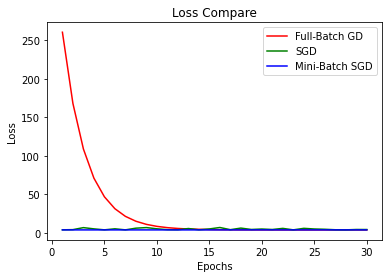

In [13]:
epochs = range(1, 31)
plt.plot(epochs, model1.losses, 'r-')
plt.plot(epochs, model2.losses, 'g-')
plt.plot(epochs, model3.losses, 'b-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Compare')

plt.legend(['Full-Batch GD', 'SGD', 'Mini-Batch SGD'])
plt.show()

## Result (c)